## Scraping car data from cars.com
    * https://medium.com/analytics-vidhya/scraping-car-prices-using-python-97086c30cd65

In [106]:
from bs4 import BeautifulSoup as bs
from requests import get
import pandas as pd
import os
import re
import ast
import datetime as dt
import numpy as np
import json

### Basic script

In [2]:
# base_url =  "https://www.cars.com/for-sale/searchresults.action/?prMx=15000&rd=50&searchSource=QUICK_FORM&zc=97230"
# response = get(base_url)
# print(response)

# html = get(base_url).text
# soup = bs(html, 'lxml')
# results = soup.find_all('div', class_= 'listing-row__details')
# print(results)

In [3]:
# for result in results:
#     car_name=result.find("h2", class_= "listing-row__title").text.strip()
#     car_age=result.find("div", class_="listing-row__stocktype").text.strip()
#     car_price=result.find("div", class_="payment-section").find("span", class_="listing-row__price").text.strip()
#     try:
#         car_mileage=result.find("div", class_="payment-section").find("span", class_="listing-row__mileage").text.strip()
#     except AttributeError:
#         pass
#     car_ex_color = result.find("ul", class_="listing-row__meta").li.text.strip().split()[-1]
#     car_int_color = result.find_all('li')[1].text.strip().split()[-1]
#     car_trans = result.find_all('li')[2].text.strip().split()[-1]
#     car_dt= result.find_all('li')[3].text.strip().split()[-1]
    
    
#     print(car_name)
#     print(car_age)
#     print(car_price)
#     print(car_mileage)
#     print(car_ex_color)
#     print(car_int_color)
#     print(car_trans)
#     print(car_dt)
#     print("----------------------")

In [4]:
# STILL TRYING TO GET THIS LAST PIECE OF DATA

# car_int_color = result.find("ul", class_="listing-row__meta").find(["li",  "strong"], text = re.compile('Int'))
# print(car_int_color)

# car = ast.literal_eval(soup.div.attrs["savedfeatureinstance vehicle"])["bodystyleName"]
# print(car)

# car = result.find("div", class_="listing-row__save switch-favorite unsaved saveVehicleHeart compare-switch-favorite")
# print(car)


### Write a function

In [5]:
# def get_info():
#     name = []
#     stocktype = []
#     mileage = []
#     price = []
#     ext_color = []
#     int_color = []
#     trans = []
#     drivetrain = []
#     data = [name, stocktype, price, mileage, ext_color, int_color, trans, drivetrain]
    
#     base_url =  "https://www.cars.com/for-sale/searchresults.action/?prMx=15000&rd=50&searchSource=QUICK_FORM&zc=97230"
#     html = get(base_url).text
#     soup = bs(html, 'lxml')
#     results = soup.find_all('div', class_= 'listing-row__details')    
    
#     for result in results:
#         try:
#             name.append(result.find("h2", class_= "listing-row__title").text.strip())
#         except AttributeError:
#             name.append("NA")
        
#         try:
#             stocktype.append(result.find("div", class_="listing-row__stocktype").text.strip())
#         except AttributeError:
#             stocktype.append("NA")
        
#         try:
#             price.append(result.find("div", class_="payment-section").find("span", class_="listing-row__price").text.strip())
#         except AttributeError:
#             price.append("NA")
        
#         try:
#             mileage.append(result.find("div", class_="payment-section").find("span", class_="listing-row__mileage").text.strip())
#         except AttributeError:
#             mileage.append("NA")
            
#         try:
#             ext_color.append(result.find("ul", class_="listing-row__meta").li.text.strip().split()[-1])
#         except AttributeError:
#             ext_color.append("NA")

#         try:
#             int_color.append(result.find_all('li')[1].text.strip().split()[-1])
#         except AttributeError:
#             int_color.append("NA")


#         try:
#             trans.append(result.find_all('li')[2].text.strip().split()[-1])
#         except AttributeError:
#             trans.append("NA")
            
#         try:
#             drivetrain.append(result.find_all('li')[3].text.strip().split()[-1])
#         except AttributeError:
#             drivetrain.append("NA")
            
#     return data

In [6]:
# get_info()

### Scrape 36 pages of car data from cars.com 
1. Create dataframe
2. Export to csv

In [107]:
name = []
stocktype = []
mileage = []
price = []
ext_color = []
int_color = []
trans = []
drivetrain = []
bodystyle=[]
data = [name, stocktype, price, mileage, ext_color, int_color, trans, drivetrain, bodystyle]

for i in range(1, 37):
    base_url =  "https://www.cars.com/for-sale/searchresults.action/?page={}&perPage=100&prMx=15000&rd=50&searchSource=PAGINATION&sort=relevance&zc=97230".format(i)
    html = get(base_url).text
    soup = bs(html, 'lxml')
    results = soup.find_all('div', class_= 'listing-row__details')

# base_url =  "https://www.cars.com/for-sale/searchresults.action/?page=1&perPage=100&prMx=15000&rd=50&searchSource=PAGINATION&sort=relevance&zc=97230"
# html = get(base_url).text
# soup = bs(html, 'lxml')
# results = soup.find_all('div', class_= 'listing-row__details')    

    for result in results:
        try:
            name.append(result.find("h2", class_= "listing-row__title").text.strip())
        except AttributeError:
            name.append("NA")

        try:
            stocktype.append(result.find("div", class_="listing-row__stocktype").text.strip())
        except AttributeError:
            stocktype.append("NA")

        try:
            price.append(result.find("div", class_="payment-section").find("span", class_="listing-row__price").text.strip())
        except AttributeError:
            price.append("NA")

        try:
            mileage.append(result.find("div", class_="payment-section").find("span", class_="listing-row__mileage").text.strip())
        except AttributeError:
            mileage.append("NA")

        try:
            ext_color.append(result.find("ul", class_="listing-row__meta").li.text.strip().split()[-1])
        except AttributeError:
            ext_color.append("NA")

        try:
            int_color.append(result.find_all('li')[1].text.strip().split()[-1])
        except AttributeError:
            int_color.append("NA")


        try:
            trans.append(result.find_all('li')[2].text.strip().split()[-1])
        except AttributeError:
            trans.append("NA")

        try:
            drivetrain.append(result.find_all('li')[3].text.strip().split()[-1])
        except AttributeError:
            drivetrain.append("NA")
            
        try:
            save_compare=(result.find(class_="listing-row__save switch-favorite unsaved saveVehicleHeart compare-switch-favorite").attrs['vehicle'])
            sc_dict = json.loads(save_compare)
            bodystyle.append(sc_dict['bodystyleName'])
        except AttributeError:
            bodystyle.append("NA")


In [108]:
data = pd.DataFrame({"Name" : name, 
                     "Stocktype" : stocktype, 
                     "Mileage_(Miles)": mileage, 
                     "Price" : price,
                    "Ext_color": ext_color,
                    "Int_color": int_color,
                    "Transmission": trans,
                    "Body_style": bodystyle})
data.head(10)

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan
3,2009 Land Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan
5,2013 Subaru XV Crosstrek 2.0i Premium,Used,"71,841 mi.","$10,991",Red,Beige,CVT,Wagon
6,2014 Chrysler 300C Base,Used,"75,188 mi.","$14,705",Gray,Black,Automatic,Sedan
7,2016 Chrysler 200 Limited,Used,"45,655 mi.","$12,112",Gray,Black,Automatic,Sedan
8,2019 Hyundai Elantra SEL,Used,"25,599 mi.","$13,702",Silver,Gray,Automatic,Sedan
9,2017 Hyundai Sonata Base,Used,"75,442 mi.","$10,519",White,Gray,Automatic,Sedan


In [109]:
# Dataframe shape
data.shape

(3505, 8)

In [110]:
# Export 
data.to_csv('Resources/cardata.csv')

## 1. Data munging
* https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c

In [111]:
data = pd.read_csv("Resources/cardata.csv", index_col=0)
data.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan
3,2009 Land Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan


##### Handle nulls

In [112]:
# Any nulls?
data.isnull().sum()

Name                0
Stocktype           0
Mileage_(Miles)    13
Price               0
Ext_color           0
Int_color           0
Transmission        0
Body_style          5
dtype: int64

In [114]:
# Drop nulls and check again
data = data.dropna(axis=0, subset=["Mileage_(Miles)"])
data.isnull().sum()

Name               0
Stocktype          0
Mileage_(Miles)    0
Price              0
Ext_color          0
Int_color          0
Transmission       0
Body_style         5
dtype: int64

##### Create Year column so we can calculate the age of the car.  New column created: Car_Age_Year

In [115]:
# Create Year column and change to datetime format
# Calculate Car_Age_Year
# drop Car_Age_Day column

data["Model_Year"] = [x[:4] for x in data['Name']]
data["Model_Year"] = pd.to_datetime(data["Model_Year"])
data["Model_Year"] = data["Model_Year"].dt.date

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [116]:
data.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01
3,2009 Land Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01


In [117]:
now = pd.to_datetime('today').date()
data['Car_Age_Day'] = now - data['Model_Year']
data["Car_Age_Year"] = round((data['Car_Age_Day'].dt.days)/365, 2)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
data.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Day,Car_Age_Year
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,3455 days,9.47
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01,1263 days,3.46
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01,1629 days,4.46
3,2009 Land Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01,4185 days,11.47
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01,3455 days,9.47


In [119]:
data2 = data.drop(columns=['Car_Age_Day'])
data2.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Year
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,9.47
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01,3.46
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01,4.46
3,2009 Land Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01,11.47
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01,9.47


##### Create a new column:  Car_Make
    * taken by splitting Name column

In [120]:
# Create new column with Car_Make
# car_list = ["Acura" , "Alfa Romeo" , "Am General" , "Aston Martin","Audi","Avanti Motors","Bentley",
#             "BMW","Bugatti","Buick,Cadillac","Chevrolet", "Chrysler","Daewoo","Daihatsu","Dodge",
#             "Eagle","Ferrari","FIAT","Fisker","Ford","Genesis","Geo","GMC","Honda","Hummer","Hyundai","INFINITI",
#             "International","Isuzu","Jaguar","Jeep","Kia","Koenigsegg","Lamborghini","Land Rover","Lexus",
#             "Lincoln","Lotus","Maserati","Maybach","Mazda","McLaren","Mercedes-Benz","Mercury","MINI",
#             "Mitsubishi","Morgan","Nissan","Oldsmobile","Panoz","Plymouth","Pontiac","Porsche","RAM","Rolls-Royce",
#             "Saab","Saleen","Saturn","Scion","smart","Subaru","Suzuki","Tesla","Toyota","Volkswagen","Volvo"]

In [121]:
# Fix the names so that there are no spaces: Land Rover, Alfa Romeo, Am General, Avanti Motors
# Then we can select Car_Make

data2.loc[data2['Name'].str.contains('Land Rover'), 'Name'] = data2.loc[data2['Name'].str.contains('Land Rover'), 'Name'].str.replace('Land Rover', 'Land_Rover')
data2.loc[data2['Name'].str.contains('Alfa Romeo'), 'Name'] = data2.loc[data2['Name'].str.contains('Alfa Romeo'), 'Name'].str.replace('Alfa Romeo', 'Alfa_Romeo')
data2.loc[data2['Name'].str.contains('Am General'), 'Name'] = data2.loc[data2['Name'].str.contains('Am General'), 'Name'].str.replace('Am General', 'Am_General')
data2.loc[data2['Name'].str.contains('Avanti Motors'), 'Name'] = data2.loc[data2['Name'].str.contains('Avanti Motors'), 'Name'].str.replace('Avanti Motors', 'Avanti_Motors')

In [122]:
data2["Car_Make"] = data2["Name"].str.split().str[1]
# data2[data2["Car_Make"].str.contains('Land_Rover')]

In [123]:
data2.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Year,Car_Make
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,9.47,Nissan
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01,3.46,Honda
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01,4.46,Nissan
3,2009 Land_Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01,11.47,Land_Rover
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01,9.47,Audi


##### Create a new column: Car_Model


In [124]:
car = data2["Name"].str.split()
print(car)

0                    [2011, Nissan, Frontier, SV]
1                [2017, Honda, Accord, EX-L, V-6]
2                      [2016, Nissan, Sentra, SV]
3                    [2009, Land_Rover, LR2, HSE]
4       [2011, Audi, A6, 3.0T, Prestige, quattro]
                          ...                    
3500         [2013, Acura, ILX, 2.0L, Technology]
3501                          [2002, BMW, 325, i]
3502                 [2016, Chevrolet, Spark, EV]
3503                       [2010, Kia, Forte, SX]
3504                         [2019, Hyundai, SEL]
Name: Name, Length: 3492, dtype: object


In [125]:
data2["Car_Model"] = data2["Name"].str.split().str[2]
data2.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Year,Car_Make,Car_Model
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,9.47,Nissan,Frontier
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01,3.46,Honda,Accord
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01,4.46,Nissan,Sentra
3,2009 Land_Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01,11.47,Land_Rover,LR2
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01,9.47,Audi,A6


##### Create a new column: Car_Trim

In [126]:
data2["Car_Trim"] = data2["Name"].str.split().str[-1]
data2.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Year,Car_Make,Car_Model,Car_Trim
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,9.47,Nissan,Frontier,SV
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01,3.46,Honda,Accord,V-6
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01,4.46,Nissan,Sentra,SV
3,2009 Land_Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01,11.47,Land_Rover,LR2,HSE
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01,9.47,Audi,A6,quattro


##### Check for FINAL nulls before exporting to csv

In [130]:
data2.isnull().sum()

Name               0
Stocktype          0
Mileage_(Miles)    0
Price              0
Ext_color          0
Int_color          0
Transmission       0
Body_style         5
Model_Year         0
Car_Age_Year       0
Car_Make           0
Car_Model          3
Car_Trim           0
dtype: int64

In [131]:
# Drop nulls and check again
data3 = data2.dropna(axis=0, subset=["Body_style","Car_Model"])
data3.isnull().sum()

Name               0
Stocktype          0
Mileage_(Miles)    0
Price              0
Ext_color          0
Int_color          0
Transmission       0
Body_style         0
Model_Year         0
Car_Age_Year       0
Car_Make           0
Car_Model          0
Car_Trim           0
dtype: int64

##### Change Price column to Integer 

In [132]:
data3['Price'] = data3['Price'].astype(str).str.replace(',', '').str.replace('$', '').astype(int)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
data3.dtypes


Name                object
Stocktype           object
Mileage_(Miles)     object
Price                int32
Ext_color           object
Int_color           object
Transmission        object
Body_style          object
Model_Year          object
Car_Age_Year       float64
Car_Make            object
Car_Model           object
Car_Trim            object
dtype: object

##### Export clean dataframe to csv

In [135]:
data3.to_csv('Resources/cardata2.csv')

## 2. Data Exploration
    * https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
    * https://www.wintellect.com/using-pandas-to-analyze-sales-data/
    * https://www.dataquest.io/blog/pandas-tutorial-python-2/

In [136]:
car_db = pd.read_csv("Resources/cardata2.csv", index_col=0)
car_db.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Year,Car_Make,Car_Model,Car_Trim
0,2011 Nissan Frontier SV,Used,"116,657 mi.",10991,Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,9.47,Nissan,Frontier,SV
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.",14491,Black,Black,Automatic,Sedan,2017-01-01,3.46,Honda,Accord,V-6
2,2016 Nissan Sentra SV,Used,"65,953 mi.",8991,White,Gray,CVT,Sedan,2016-01-01,4.46,Nissan,Sentra,SV
3,2009 Land_Rover LR2 HSE,Used,"25,420 mi.",10991,Black,Black,Automatic,SUV,2009-01-01,11.47,Land_Rover,LR2,HSE
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.",8991,Black,Black,Automatic,Sedan,2011-01-01,9.47,Audi,A6,quattro


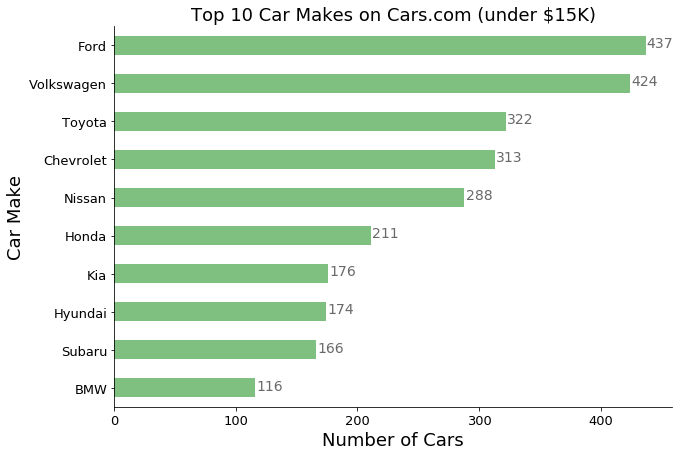

In [77]:
# Top 10 cars make on the market

ax  = car_db.groupby("Car_Make")["Name"].count().sort_values(ascending=False).nlargest(10).plot(kind='barh', 
                                                                            figsize=(10,7),color="green", alpha=0.5, fontsize=13);

# ax.set_alpha(0.8)
ax.set_title("Top 10 Car Makes on Cars.com (under $15K)", fontsize=18)
ax.set_xlabel("Number of Cars", fontsize=18)
ax.set_ylabel("Car Make", fontsize=18)

# # create a list to collect the plt.patches data
# totals = []
# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+0.3, \
            str(i.get_width()), fontsize=14,
            color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


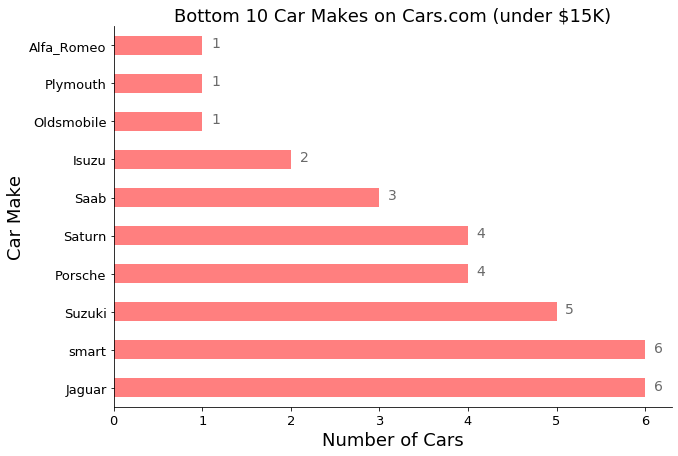

In [76]:
# Bottom 10 cars make on the market

ax  = car_db.groupby("Car_Make")["Name"].count().sort_values(ascending=True).head(10).plot(kind='barh', 
                                                                            figsize=(10,7),color="red", alpha=0.5, fontsize=13);

ax.set_title("Bottom 10 Car Makes on Cars.com (under $15K)", fontsize=18)
ax.set_xlabel("Number of Cars", fontsize=18)
ax.set_ylabel("Car Make", fontsize=18)

# # create a list to collect the plt.patches data
# totals = []
# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.1, i.get_y()+0.3, \
            str(i.get_width()), fontsize=14,
            color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [98]:
# Of the Top 10 cars on the market, what's the average price?

top10_cars = car_db.groupby("Car_Make")["Name"].count().sort_values(ascending=False).head(10)

top10_cars.describe()

count     10.000000
mean     262.700000
std      111.561692
min      116.000000
25%      174.500000
50%      249.500000
75%      319.750000
max      437.000000
Name: Name, dtype: float64

In [101]:
car_db.groupby("Car_Make").agg(
    min_price=pd.NamedAgg(column='Price', aggfunc='min'),
    max_price=pd.NamedAgg(column='Price', aggfunc='max'),
    average_price=pd.NamedAgg(column='Price', aggfunc=np.mean))

,min_price,max_price,average_price
Car_Make,,,
Acura,4200,14991,9670.896552
Alfa_Romeo,3995,3995,3995.000000
Audi,1500,14999,10494.115385
BMW,2995,15000,10484.905172
Buick,2500,14990,8906.538462
Cadillac,3000,14999,10353.304348
Chevrolet,1500,15000,10214.747604
Chrysler,1750,14998,9805.841270
Dodge,450,14998,9512.715686


In [104]:
car_db.groupby(['Car_Make', 'Car_Model']).mean()

Price  Car_Age_Year
Car_Make Car_Model                            
Acura    ILX        11740.500000      7.460000
         MDX         9513.200000     12.469000
         RDX        11067.750000     10.967500
         RSX         8995.000000     14.470000
         TL          9681.100000     11.869000
...                          ...           ...
Volvo    V70         3888.000000     19.470000
         XC60       12438.500000      8.965000
         XC70        6747.000000     12.970000
         XC90        7306.000000     13.468750
smart    ForTwo      8433.666667      7.296667

[368 rows x 2 columns]